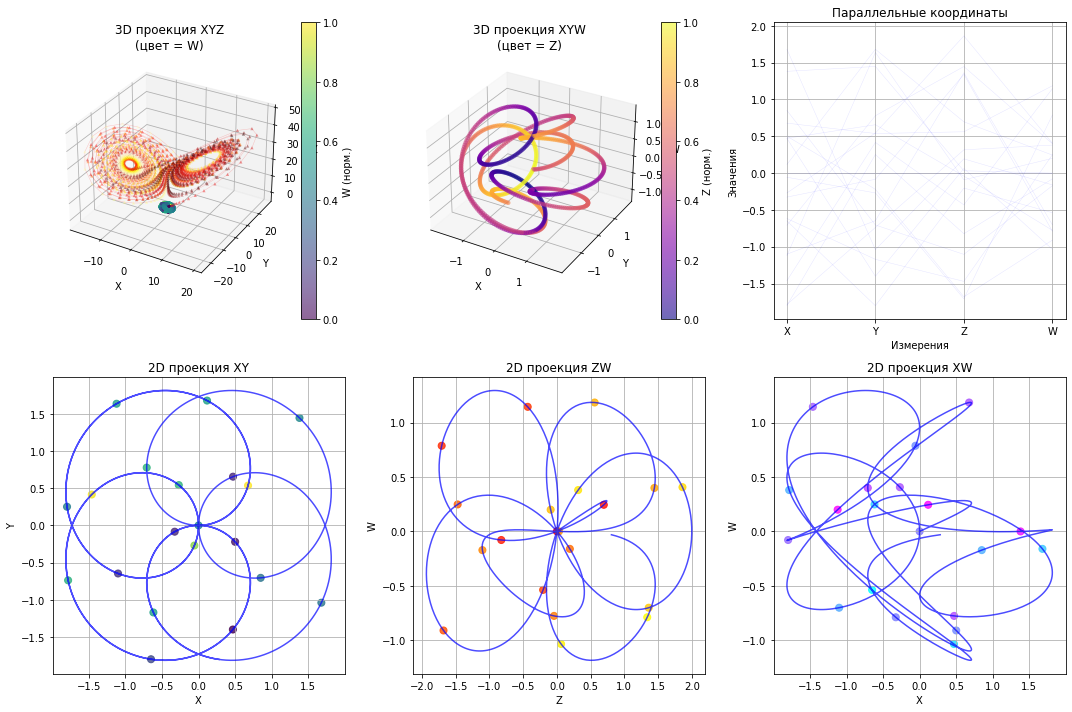

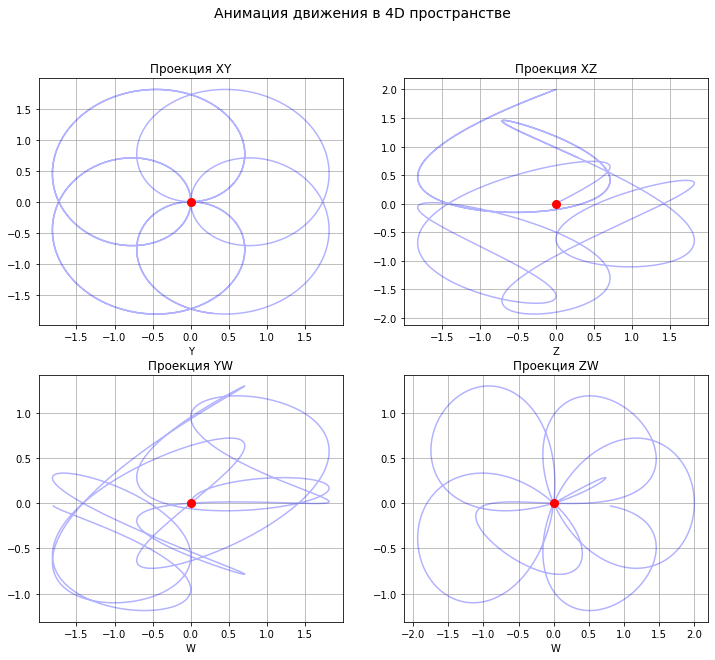

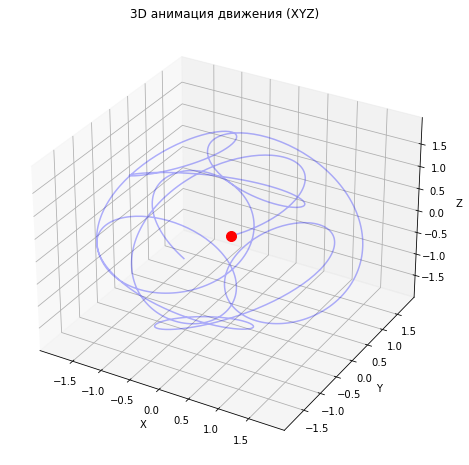

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def lorenz_4d(t, point, sigma=10, rho=28, beta=8/3, eta=0.1):
    x, y, z, w = point
    dx = sigma * (y - x) + eta * w
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    dw = -0.5 * x - 0.5 * y - 0.3 * w
    return [dx, dy, dz, dw]

def hyperspiral(t, R=1, omega1=1, omega2=1.5, omega3=0.7, omega4=0.3):
    phi = omega1 * t
    theta = omega2 * t
    psi = omega3 * t
    chi = omega4 * t
    
    x = R * np.sin(phi) * np.cos(theta)
    y = R * np.sin(phi) * np.sin(theta)
    z = R * np.cos(phi) * np.sin(psi)
    w = R * np.cos(phi) * np.cos(psi) * np.sin(chi)
    return x, y, z, w

def visualize_4d_trajectories():
    fig = plt.figure(figsize=(15, 10))
    
    ax1 = fig.add_subplot(231, projection='3d')
    ax1.set_title('3D проекция XYZ\n(цвет = W)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax2 = fig.add_subplot(232, projection='3d')
    ax2.set_title('3D проекция XYW\n(цвет = Z)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('W')
    
    ax3 = fig.add_subplot(233)
    ax3.set_title('Параллельные координаты')
    ax3.set_xlabel('Измерения')
    ax3.set_ylabel('Значения')
    ax3.set_xticks([0, 1, 2, 3])
    ax3.set_xticklabels(['X', 'Y', 'Z', 'W'])
    ax3.grid(True)
    
    ax4 = fig.add_subplot(234)
    ax4.set_title('2D проекция XY')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.grid(True)
    
    ax5 = fig.add_subplot(235)
    ax5.set_title('2D проекция ZW')
    ax5.set_xlabel('Z')
    ax5.set_ylabel('W')
    ax5.grid(True)
    
    ax6 = fig.add_subplot(236)
    ax6.set_title('2D проекция XW')
    ax6.set_xlabel('X')
    ax6.set_ylabel('W')
    ax6.grid(True)
    
    
    t = np.linspace(0, 20, 1000)
    x1, y1, z1, w1 = hyperspiral(t, R=2)
    
    w_norm1 = (w1 - w1.min()) / (w1.max() - w1.min())
    z_norm1 = (z1 - z1.min()) / (z1.max() - z1.min())
    
    scatter1 = ax1.scatter(x1, y1, z1, c=w_norm1, cmap='viridis', 
                          alpha=0.6, s=20, linewidth=0)
    ax1.plot(x1, y1, z1, 'k-', alpha=0.3, linewidth=0.5)
    plt.colorbar(scatter1, ax=ax1, label='W (норм.)')
    
    scatter2 = ax2.scatter(x1, y1, w1, c=z_norm1, cmap='plasma', 
                          alpha=0.6, s=20, linewidth=0)
    ax2.plot(x1, y1, w1, 'k-', alpha=0.3, linewidth=0.5)
    plt.colorbar(scatter2, ax=ax2, label='Z (норм.)')
    
    for i in range(0, len(x1), 50):
        coords = [x1[i], y1[i], z1[i], w1[i]]
        ax3.plot([0, 1, 2, 3], coords, 'b-', alpha=0.1, linewidth=0.5)
    
    ax4.plot(x1, y1, 'b-', alpha=0.7)
    ax4.scatter(x1[::50], y1[::50], c=w_norm1[::50], cmap='viridis', 
               s=50, alpha=0.8)
    
    ax5.plot(z1, w1, 'b-', alpha=0.7)
    ax5.scatter(z1[::50], w1[::50], c=t[::50], cmap='autumn', 
               s=50, alpha=0.8)
    
    ax6.plot(x1, w1, 'b-', alpha=0.7)
    ax6.scatter(x1[::50], w1[::50], c=y1[::50], cmap='cool', 
               s=50, alpha=0.8)
    
    from scipy.integrate import solve_ivp
    
    t_span = (0, 50)
    t_eval = np.linspace(0, 50, 2000)
    initial_state = [1.0, 1.0, 1.0, 0.5]
    
    solution = solve_ivp(lorenz_4d, t_span, initial_state, 
                         t_eval=t_eval, method='RK45')
    
    x2, y2, z2, w2 = solution.y
    
    w_norm2 = (w2 - w2.min()) / (w2.max() - w2.min())
    scatter3 = ax1.scatter(x2, y2, z2, c=w_norm2, cmap='hot', 
                          alpha=0.4, s=10, linewidth=0, marker='^')
    ax1.plot(x2, y2, z2, 'r-', alpha=0.2, linewidth=0.5)
    
    def animate_trajectory():
        fig_anim, ax_anim = plt.subplots(2, 2, figsize=(12, 10))
        fig_anim.suptitle('Анимация движения в 4D пространстве', fontsize=14)
        
        frames = 100
        indices = np.linspace(0, len(x1)-1, frames, dtype=int)
        
        lines = []
        scatters = []
        
        for i, (ax, title, x_data, y_data, z_data) in enumerate([
            (ax_anim[0, 0], 'Проекция XY', x1, y1, None),
            (ax_anim[0, 1], 'Проекция XZ', x1, z1, None),
            (ax_anim[1, 0], 'Проекция YW', y1, w1, None),
            (ax_anim[1, 1], 'Проекция ZW', z1, w1, None)
        ]):
            ax.set_title(title)
            ax.grid(True)
            ax.set_xlabel(title[10:12])
            ax.set_ylabel(title[12:14])
            
            line, = ax.plot(x_data, y_data, 'b-', alpha=0.3)
            lines.append(line)
            
            scatter, = ax.plot([], [], 'ro', markersize=8)
            scatters.append(scatter)
        
        def update(frame):
            idx = indices[frame]
            for i, scatter in enumerate(scatters):
                if i == 0:
                    scatter.set_data([x1[idx]], [y1[idx]])
                elif i == 1:
                    scatter.set_data([x1[idx]], [z1[idx]])
                elif i == 2:
                    scatter.set_data([y1[idx]], [w1[idx]])
                elif i == 3:
                    scatter.set_data([z1[idx]], [w1[idx]])
            return scatters
        
        anim = animation.FuncAnimation(fig_anim, update, frames=frames, 
                                      interval=50, blit=True)
        
        return anim
    
    def create_3d_animation():
        fig_3d = plt.figure(figsize=(10, 8))
        ax_3d = fig_3d.add_subplot(111, projection='3d')
        ax_3d.set_title('3D анимация движения (XYZ)')
        ax_3d.set_xlabel('X')
        ax_3d.set_ylabel('Y')
        ax_3d.set_zlabel('Z')
        
        ax_3d.plot(x1, y1, z1, 'b-', alpha=0.3)
        
        point, = ax_3d.plot([], [], [], 'ro', markersize=10)
        
        history_line, = ax_3d.plot([], [], [], 'r-', alpha=0.6, linewidth=2)
        
        frames = 100
        indices = np.linspace(0, len(x1)-1, frames, dtype=int)
        
        def update_3d(frame):
            idx = indices[frame]
            
            point.set_data([x1[idx]], [y1[idx]])
            point.set_3d_properties([z1[idx]])
            
            start_idx = max(0, idx - 20)
            history_line.set_data(x1[start_idx:idx], y1[start_idx:idx])
            history_line.set_3d_properties(z1[start_idx:idx])
            
            return point, history_line
        
        anim_3d = animation.FuncAnimation(fig_3d, update_3d, frames=frames,
                                         interval=50, blit=True)
        
        return anim_3d
    
    plt.tight_layout()
    plt.show()
    
    anim_2d = animate_trajectory()
    anim_3d = create_3d_animation()
    
    return anim_2d, anim_3d

if __name__ == "__main__":
    anim2d, anim3d = visualize_4d_trajectories()
    plt.show()